In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from bs4 import BeautifulSoup

# Corpus Building

In [80]:
url="https://en.wikipedia.org/wiki/New7Wonders_of_the_World"

content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(content, "lxml")
print(soup.prettify()) 

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   New7Wonders of the World - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XoE@pwpAMFsAAHdMXKsAAACD","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"New7Wonders_of_the_World","wgTitle":"New7Wonders of the World","wgCurRevisionId":942697596,"wgRevisionId":942697596,"wgArticleId":7486293,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 Portuguese-language sources (pt)","Wikipedia semi-protected pages","Articles with short de

Creating first corpus from (https://en.wikipedia.org/wiki/New7Wonders_of_the_World)

In [81]:
fp = open('corpus1.txt', 'w+')

In [82]:
text = ""
for i in range(1, 7):
    text += soup.select('div p')[i].get_text()
print (text)

New7Wonders of the World (2000–2007) was a campaign started in 2000 to choose Wonders of the World from a selection of 200 existing monuments.[1] The popularity poll was led by Canadian-Swiss Bernard Weber and organized by the New7Wonders Foundation based in Zurich, Switzerland, with winners announced on 7 July 2007 in Lisbon.[2][3]
The New7Wonders Foundation said that more than 100 million votes were cast through the Internet or by telephone. Voting via the Internet was limited to one vote for seven monuments per person/identity, but multiple voting was possible through telephone.[4] Hence the poll was considered unscientific.[5] According to John Zogby, founder and current President/CEO of the Utica, New York-based polling organization Zogby International, New7Wonders Foundation drove "the largest poll on record".[3]
The program drew a wide range of official reactions. Some countries touted their finalist and tried to get more votes cast for it, while others downplayed or criticized 

In [83]:
text = re.sub(r'\[[0-9]*\]', '', text)
print (text)

New7Wonders of the World (2000–2007) was a campaign started in 2000 to choose Wonders of the World from a selection of 200 existing monuments. The popularity poll was led by Canadian-Swiss Bernard Weber and organized by the New7Wonders Foundation based in Zurich, Switzerland, with winners announced on 7 July 2007 in Lisbon.
The New7Wonders Foundation said that more than 100 million votes were cast through the Internet or by telephone. Voting via the Internet was limited to one vote for seven monuments per person/identity, but multiple voting was possible through telephone. Hence the poll was considered unscientific. According to John Zogby, founder and current President/CEO of the Utica, New York-based polling organization Zogby International, New7Wonders Foundation drove "the largest poll on record".
The program drew a wide range of official reactions. Some countries touted their finalist and tried to get more votes cast for it, while others downplayed or criticized the contest. After

In [84]:
text += '\n'+soup.select('h2')[1].get_text()
text += '\n' + soup.select('div p')[7].get_text()

Extracting content from the tables present on the Wikipedia page from (https://en.wikipedia.org/wiki/New7Wonders_of_the_World)

In [85]:
from pandas.io.html import read_html
wt = read_html(url, attrs={"class": "wikitable"})
print("Extracted {num} tables".format(num=len(wt)))

Extracted 2 tables


In [86]:
#Verifying content of the first infobox
wt[0].head()

,Wonder,Location,Image,Year
0,Great Pyramid of Giza (honorary status),"Giza Necropolis, Egypt",NaN,2560 BC
1,Great Wall of China,China,NaN,700 BC
2,Petra,"Ma'an, Jordan",NaN,312 BC
3,Colosseum,"Rome, Italy",NaN,80 AD
4,Chichen Itza,"Yucatán, Mexico",NaN,600 AD


In [87]:
#Verifying content of the second infobox
wt[1].head(13)

,Wonder,Location,Image,Year
0,Stonehenge,"Amesbury, United Kingdom",NaN,2400 BCE
1,Acropolis of Athens,"Athens, Greece",NaN,447 BCE
2,Hagia Sophia,"İstanbul, Turkey",NaN,537
3,Angkor Wat,"Angkor, Cambodia",NaN,1113
4,Moai,"Easter Island, Chile",NaN,1250
5,Timbuktu,"Timbuktu, Mali",NaN,1327
6,Alhambra,"Granada, Spain",NaN,1333
7,Red Square,"Moscow, Russia",NaN,1561
8,Kiyomizu-dera,"Kyoto, Japan",NaN,1633
9,Neuschwanstein,"Füssen, Germany",NaN,1869


In [88]:
#Removing all columns with NaN values from the 1st table
wt[0]=wt[0].dropna(axis='columns')

In [89]:
#saving the 1st table which contains the details of the new7wonders of the world
wt[0].to_csv(r'C:\Users\sonal\Documents\Assignment3\winners.csv', index=None)

In [90]:
#verifying the saved content
csv = pd.read_csv("winners.csv")
csv

,Wonder,Location,Year
0,Great Pyramid of Giza (honorary status),"Giza Necropolis, Egypt",2560 BC
1,Great Wall of China,China,700 BC
2,Petra,"Ma'an, Jordan",312 BC
3,Colosseum,"Rome, Italy",80 AD
4,Chichen Itza,"Yucatán, Mexico",600 AD
5,Machu Picchu,"Cuzco Region, Peru",1450 AD
6,Taj Mahal,"Agra, Uttar Pradesh, India",1643 AD
7,Christ the Redeemer,"Rio de Janeiro, Brazil",1931 AD


In [91]:
#Extracting and adding more information from the same page to the corpus
text += '\n'+soup.select('h2')[2].get_text()
text += '\n'+soup.select('h3')[0].get_text()
for i in range(8,11):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h3')[1].get_text()
for i in range(11,14):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h3')[2].get_text()
for i in range(14,15):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h3')[3].get_text()
for i in range(15,16):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h3')[4].get_text()
for i in range(16,17):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h3')[5].get_text()
for i in range(17,18):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h3')[6].get_text()
for i in range(18,19):
    text += '\n'+soup.select('div p')[i].get_text()
text += '\n'+soup.select('h2')[3].get_text()
text += '\n'+soup.select('div p')[19].get_text()

In [92]:
#Adding the finalists to the corpus
df = wt[1].copy()
df.dropna(axis='columns')
finalists = df['Wonder'].to_list()
print(finalists)

['Stonehenge', 'Acropolis of Athens', 'Hagia Sophia', 'Angkor Wat', 'Moai', 'Timbuktu', 'Alhambra', 'Red Square', 'Kiyomizu-dera', 'Neuschwanstein', 'Statue of Liberty', 'Eiffel Tower', 'Sydney Opera House']


In [93]:
listToStr = ', '.join([str(elem) for elem in finalists]) 
text += '\n'+listToStr
print(text)

New7Wonders of the World (2000–2007) was a campaign started in 2000 to choose Wonders of the World from a selection of 200 existing monuments. The popularity poll was led by Canadian-Swiss Bernard Weber and organized by the New7Wonders Foundation based in Zurich, Switzerland, with winners announced on 7 July 2007 in Lisbon.
The New7Wonders Foundation said that more than 100 million votes were cast through the Internet or by telephone. Voting via the Internet was limited to one vote for seven monuments per person/identity, but multiple voting was possible through telephone. Hence the poll was considered unscientific. According to John Zogby, founder and current President/CEO of the Utica, New York-based polling organization Zogby International, New7Wonders Foundation drove "the largest poll on record".
The program drew a wide range of official reactions. Some countries touted their finalist and tried to get more votes cast for it, while others downplayed or criticized the contest. After

In [94]:
fp.write(text)

5564

In [95]:
fp.close()

In [54]:
#Adding details of the finalists from the extracted table to a CSV file
wt[1]=wt[1].dropna(axis='columns')
wt[1].to_csv(r'C:\Users\sonal\Documents\Assignment3\finalists.csv', index=None)

#### Converting inforboxes of honorary wonder and New7Wonders to corpus

#### 1. The Great Pyramid of Giza

In [ ]:
## page = 'https://en.wikipedia.org/wiki/Great_Pyramid_of_Giza'
infobox = read_html(page, index_col=0, attrs={"class":"infobox"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

In [20]:
#Verifying the extracted data from the infobox
infobox[0]

,The Great Pyramid of Giza.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
The Great Pyramid of Giza,,,,,
The Great Pyramid of Giza in March 2005,The Great Pyramid of Giza in March 2005,NaN,NaN,NaN,NaN
Khufu,Khufu,NaN,NaN,NaN,NaN
Coordinates,29°58′45″N 31°08′03″E﻿ / ﻿29.97917°N 31.13417°...,NaN,NaN,NaN,NaN
Ancient name,[1]ʒḫt ḪwfwAkhet KhufuKhufu's Horizon,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Dropping NaN values
df = infobox[0].copy()
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']
del df['Unnamed: 5']
df

,The Great Pyramid of Giza.1
The Great Pyramid of Giza,
The Great Pyramid of Giza in March 2005,The Great Pyramid of Giza in March 2005
Khufu,Khufu
Coordinates,29°58′45″N 31°08′03″E﻿ / ﻿29.97917°N 31.13417°...
Ancient name,[1]ʒḫt ḪwfwAkhet KhufuKhufu's Horizon
NaN,NaN
NaN,NaN
NaN,NaN
NaN,NaN
NaN,NaN


In [23]:
df=df.dropna()
df

,The Great Pyramid of Giza.1
The Great Pyramid of Giza,
The Great Pyramid of Giza in March 2005,The Great Pyramid of Giza in March 2005
Khufu,Khufu
Coordinates,29°58′45″N 31°08′03″E﻿ / ﻿29.97917°N 31.13417°...
Ancient name,[1]ʒḫt ḪwfwAkhet KhufuKhufu's Horizon
Constructed,c. 2580–2560 BC (4th dynasty)
Type,True pyramid
Material,"Limestone, granite"
Height,146.7 metres (481 ft) or 280 Egyptian Royal cu...
Base,Length of 230.34 metres (756 ft) or 440 Egypti...


In [24]:
#Resetting the table information
df = df.reset_index()
df

,The Great Pyramid of Giza,The Great Pyramid of Giza.1
0,The Great Pyramid of Giza in March 2005,The Great Pyramid of Giza in March 2005
1,Khufu,Khufu
2,Coordinates,29°58′45″N 31°08′03″E﻿ / ﻿29.97917°N 31.13417°...
3,Ancient name,[1]ʒḫt ḪwfwAkhet KhufuKhufu's Horizon
4,Constructed,c. 2580–2560 BC (4th dynasty)
5,Type,True pyramid
6,Material,"Limestone, granite"
7,Height,146.7 metres (481 ft) or 280 Egyptian Royal cu...
8,Base,Length of 230.34 metres (756 ft) or 440 Egypti...
9,Volume,"2,583,283 cubic metres (91,227,778 cu ft)"


In [25]:
#Writting data to a CSV file
df.to_csv('Giza.csv', index=None, encoding='utf-8')

#### 2. The Great Wall of China

In [26]:
page = 'https://en.wikipedia.org/wiki/Great_Wall_of_China'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [27]:
#verifying the content extracted
infobox[0]

,Great Wall of China.1
Great Wall of China,
萬里長城,萬里長城
The Ming dynasty Great Wall at Jinshanling,The Ming dynasty Great Wall at Jinshanling
Map of all the wall constructions,Map of all the wall constructions
General information,General information
Type,Fortification
Country,China
Coordinates,40°41′N 117°14′E﻿ / ﻿40.68°N 117.23°ECoordinat...
Technical details,Technical details
Size,"21,196 km (13,171 mi)[1]"


In [28]:
#Removing NaN values
df = infobox[0].copy()
df=df.dropna()
#Resetting the extracted infobox
df = df.reset_index()
df

,Great Wall of China,Great Wall of China.1
0,萬里長城,萬里長城
1,The Ming dynasty Great Wall at Jinshanling,The Ming dynasty Great Wall at Jinshanling
2,Map of all the wall constructions,Map of all the wall constructions
3,General information,General information
4,Type,Fortification
5,Country,China
6,Coordinates,40°41′N 117°14′E﻿ / ﻿40.68°N 117.23°ECoordinat...
7,Technical details,Technical details
8,Size,"21,196 km (13,171 mi)[1]"
9,UNESCO World Heritage Site,UNESCO World Heritage Site


In [29]:
#Writting data to a CSV file
df.to_csv('China.csv', index=None, encoding='utf-8')

#### 4. Petra

In [30]:
page = 'https://en.wikipedia.org/wiki/Petra'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [31]:
df = infobox[0].copy()
df=df.dropna()
df = df.reset_index()
df

,PetraRaqmu,PetraRaqmu.1
0,Tourists in front of Al Khazneh (The Treasury)...,Tourists in front of Al Khazneh (The Treasury)...
1,Location,"Ma'an Governorate, Jordan"
2,Coordinates,30°19′43″N 35°26′31″E﻿ / ﻿30.32861°N 35.44194°...
3,Area,264 square kilometres (102 sq mi)[1]
4,Elevation,"810 m (2,657 ft)"
5,Built,possibly as early as 5th century BC [2]
6,Visitors,"1,135,300 (in 2019)"
7,Governing body,Petra Region Authority
8,Website,www.visitpetra.jo
9,Location of PetraRaqmu in Jordan,Location of PetraRaqmu in Jordan


In [32]:
df.to_csv('Petra.csv', index=None, encoding='utf-8')

#### 4. Colosseum

In [33]:
#Extracting the infobox
page = 'https://en.wikipedia.org/wiki/Colosseum'
infobox = read_html(page, index_col=0, attrs={"class":"infobox geography"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [34]:
#Removing the null values
df = infobox[0].copy()
df=df.dropna()
#Resetting the infobox content
df = df.reset_index()
df

,Colosseum,Colosseum.1
0,Location,"Regio IV Templum Pacis (""Temple of Peace""), Ro..."
1,Built in,70–80 AD
2,Built by/for,"Vespasian, Titus"
3,Type of structure,Amphitheatre
4,Related,List of ancient monumentsin Rome


In [35]:
#Writting the content to a CSV file
df.to_csv('Colosseum.csv', index=None, encoding='utf-8')

#### 5. Chichen_Itza

In [36]:
page = 'https://en.wikipedia.org/wiki/Chichen_Itza'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [37]:
df = infobox[0].copy()
df=df.dropna()
df = df.reset_index()
df

,0,1
0,El Castillo (Temple of Kukulcan) dominates the...,El Castillo (Temple of Kukulcan) dominates the...
1,Location within Mesoamerica,Location within Mesoamerica
2,Location,"Yucatán, Mexico"
3,Region,Yucatán
4,Coordinates,20°40′59″N 88°34′7″W﻿ / ﻿20.68306°N 88.56861°W...
5,History,History
6,Periods,Late Classic to Early Postclassic
7,Cultures,Maya civilization
8,UNESCO World Heritage Site,UNESCO World Heritage Site
9,Official name,Pre-Hispanic City of Chichen-Itza


In [38]:
df.to_csv('Itza.csv', index=None, encoding='utf-8')

#### 6. Machu Picchu

In [39]:
page = 'https://en.wikipedia.org/wiki/Machu_Picchu'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [40]:
df = infobox[0].copy()
df=df.dropna()
df = df.reset_index()
df

,0,1
0,Machu Picchu in 2009,Machu Picchu in 2009
1,Shown within Peru,Shown within Peru
2,Location,Peru └ Cuzco Region
3,Coordinates,13°09′48″S 72°32′44″W﻿ / ﻿13.16333°S 72.54556°...
4,Height,"2,430 metres (7,970 ft)"
5,History,History
6,Founded,c. 1450
7,Abandoned,1572[1]
8,Cultures,Inca civilization
9,Site notes,Site notes


In [41]:
df.to_csv('Picchu.csv', index=None, encoding='utf-8')

#### 7. Taj Mahal

In [42]:
page = 'https://en.wikipedia.org/wiki/Taj_Mahal'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [43]:
df = infobox[0].copy()
df=df.dropna()
df = df.reset_index()
df

,Taj Mahal,Taj Mahal.1
0,Location,"Agra, Uttar Pradesh, India"
1,Coordinates,27°10′30″N 78°02′31″E﻿ / ﻿27.17500°N 78.04194°...
2,Area,17 hectares[1]
3,Height,73 m (240 ft)
4,Built,1632–53[2]
5,Built for,Mumtaz Mahal
6,Architect,Ustad Ahmad Lahauri
7,Architectural style(s),Mughal architecture
8,Visitors,7–8 million[3] (in 2014)
9,Governing body,Government of India


In [44]:
df.to_csv('Taj.csv', index=None, encoding='utf-8')

#### 8. Christ the Redeemer (statue)

In [45]:
page = 'https://en.wikipedia.org/wiki/Christ_the_Redeemer_(statue)'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [46]:
df = infobox[0].copy()
df=df.dropna()
df = df.reset_index()
df

,0,1
0,Coordinates,22°57′7″S 43°12′38″W﻿ / ﻿22.95194°S 43.21056°W...
1,Location,"Corcovado mountain, Rio de Janeiro, Brazil"
2,Designer,Designed by sculptor Paul Landowski and built ...
3,Material,Soapstone
4,Height,30 metres (98 ft) and 38 metres (125 ft) tall ...
5,Completion date,"Dedicated October 12, 1931"
6,"Consecrated October 12, 2006New Seven Wonders ...","Consecrated October 12, 2006New Seven Wonders ..."
7,National Historic Heritage of Brazil,National Historic Heritage of Brazil
8,Designated,2001
9,Reference no.,1478


In [47]:
df.to_csv('Christ.csv', index=None, encoding='utf-8')

#### 9. Stonehenge

In [48]:
page = 'https://en.wikipedia.org/wiki/Stonehenge'
infobox = read_html(page, index_col=0, attrs={"class":"infobox vcard"})
print("Extracted {num} infoboxes".format(num=len(infobox)))

Extracted 1 infoboxes


In [49]:
df = infobox[0].copy()
df=df.dropna()
df = df.reset_index()
df

,0,1
0,Stonehenge in July 2007,Stonehenge in July 2007
1,Map of Wiltshire showing the location of Stone...,Map of Wiltshire showing the location of Stone...
2,Location,"Wiltshire, England"
3,Coordinates,51°10′44″N 1°49′34″W﻿ / ﻿51.17889°N 1.82611°WC...
4,Type,Monument
5,Height,Each standing stone was around 4.1 metres (13 ...
6,History,History
7,Material,"Sarsen, Bluestone"
8,Founded,Bronze Age
9,Site notes,Site notes


In [50]:
df.to_csv('Stonehenge.csv', index=None, encoding='utf-8')

# The Text Normalizer

In [55]:
#Importing libraries
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from contractions import CONTRACTION_MAP
import unicodedata

#Reference for contractions: https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py

#### 1. Function to remove Accented Characters

In [56]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#### 2. Function to remove Special Characters

In [57]:
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

#### 3. Function to do Text Lemmatization

In [58]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

#### 4. Function to Expand Contractions

In [60]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

#### 5. Function to perform Text Stemming

In [61]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

#### 6. Function to remove stop words 

In [64]:
nlp = spacy.load('en', parse=True, tag=True, entity=True)
tokenizer = ToktokTokenizer()

#Removing negation words from the list of stop words since they might be useful in providing meaning to a sentence
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

#Function to remove stop words
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [70]:
#Creating the text normalizer

def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, text_stemming=True,
                     special_char_removal=True,
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # Stemming text
        if text_stemming:
            doc = simple_stemmer(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc) 
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

# Pre-Processing and Normalizing the Corpus

In [75]:
#Normalizing the first created corpus document
corpus0 = normalize_corpus([text])

#Normalizing the infoboxes
df = pd.read_csv('winners.csv')
df['full_text'] = df["Wonder"]+ '. ' + df["Location"]+ '. ' + df["Year"]
corpus1 = normalize_corpus(df['full_text'])

df1 = pd.read_csv('finalists.csv')
df1['full_text'] = df1["Wonder"]+ '. ' + df1["Location"]+ '. ' + df1["Year"]
corpus2 = normalize_corpus(df1['full_text'])

df2 = pd.read_csv('China.csv')
df2['full_text'] = df2["Great Wall of China"]+ '. ' + df2["Great Wall of China.1"]
corpus3 = normalize_corpus(df2['full_text'])

df3 = pd.read_csv('Christ.csv')
df3['full_text'] = df3["0"]+ '. ' + df3["1"]
corpus4 = normalize_corpus(df3['full_text'])

df4 = pd.read_csv('Colosseum.csv')
df4['full_text'] = df4["Colosseum"]+ '. ' + df4["Colosseum.1"]
corpus5 = normalize_corpus(df4['full_text'])

df5 = pd.read_csv('Giza.csv')
df5['full_text'] = df5["The Great Pyramid of Giza"]+ '. ' + df5["The Great Pyramid of Giza.1"]
corpus6 = normalize_corpus(df5['full_text'])

df6 = pd.read_csv('Itza.csv')
df6['full_text'] = df6["0"]+ '. ' + df6["1"]
corpus7 = normalize_corpus(df6['full_text'])

df7 = pd.read_csv('Petra.csv')
df7['full_text'] = df7["PetraRaqmu"]+ '. ' + df7["PetraRaqmu.1"]
corpus8 = normalize_corpus(df7['full_text'])

df8 = pd.read_csv('Picchu.csv')
df8['full_text'] = df8["0"]+ '. ' + df8["1"]
corpus9 = normalize_corpus(df8['full_text'])

df9 = pd.read_csv('Taj.csv')
df9['full_text'] = df9["Taj Mahal"]+ '. ' + df9["Taj Mahal.1"]
corpus10 = normalize_corpus(df9['full_text'])

df10 = pd.read_csv('Stonehenge.csv')
df10['full_text'] = df10["0"]+ '. ' + df10["1"]
corpus11 = normalize_corpus(df10['full_text'])

#Merging all the documents to create one corpus
corpus = corpus0+corpus1+corpus2+corpus3+corpus4+corpus5+corpus6+corpus7+corpus8+corpus9+corpus10+corpus11
print(corpus)

['new7wond world 20002007 campaign start 2000 choos wonder world select 200 exist monument popular poll lead canadian swiss bernard weber organ new7wond foundat base zurich switzerland winner announc 7 juli 2007 lisbon new7wond foundat say 100 million vote cast internet telephon vote via internet limit one vote seven monument per person ident multipl vote possibl telephon henc poll consid unscientif accord john zogbi founder current presid ceo utica new york base poll organ zogbi intern new7wond foundat drive larg poll record program draw wide rang offici reaction countri tout finalist tri get vote cast downplay critic contest support new7wond foundat begin campaign provid advic nomine select unit nation educ scientif cultur organ unesco bylaw record give equal statu world heritag site distanc undertak 2001 2007 new7wond foundat establish 2001 reli privat donat sale broadcast right receiv no public fund final announc new7wond say not earn anyth exercis bare recov invest although n7w de

#### Performing text stemming is messing up with the spellings, hence I will be removing that. Also, I will not be performing text lemmatization, special character removal or lower case conversion to the data extracted from infoboxes since it is changing the original data.

In [99]:
#Removing citations from the first corpus
text = re.sub(r'\[[0-9]*\]', '', text)

#Normalizing the first created corpus document
corpus0 = normalize_corpus([text], text_stemming=False)

#Normalizing the infoboxes
df = pd.read_csv('winners.csv')
df['full_text'] = df["Wonder"]+ '. ' + df["Location"]+ '. ' + df["Year"]
corpus1 = normalize_corpus(df['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df1 = pd.read_csv('finalists.csv')
df1['full_text'] = df1["Wonder"]+ '. ' + df1["Location"]+ '. ' + df1["Year"]
corpus2 = normalize_corpus(df1['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df2 = pd.read_csv('China.csv')
df2['full_text'] = df2["Great Wall of China"]+ '. ' + df2["Great Wall of China.1"]
corpus3 = normalize_corpus(df2['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df3 = pd.read_csv('Christ.csv')
df3['full_text'] = df3["0"]+ '. ' + df3["1"]
corpus4 = normalize_corpus(df3['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df4 = pd.read_csv('Colosseum.csv')
df4['full_text'] = df4["Colosseum"]+ '. ' + df4["Colosseum.1"]
corpus5 = normalize_corpus(df4['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df5 = pd.read_csv('Giza.csv')
df5['full_text'] = df5["The Great Pyramid of Giza"]+ '. ' + df5["The Great Pyramid of Giza.1"]
corpus6 = normalize_corpus(df5['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df6 = pd.read_csv('Itza.csv')
df6['full_text'] = df6["0"]+ '. ' + df6["1"]
corpus7 = normalize_corpus(df6['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df7 = pd.read_csv('Petra.csv')
df7['full_text'] = df7["PetraRaqmu"]+ '. ' + df7["PetraRaqmu.1"]
corpus8 = normalize_corpus(df7['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df8 = pd.read_csv('Picchu.csv')
df8['full_text'] = df8["0"]+ '. ' + df8["1"]
corpus9 = normalize_corpus(df8['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df9 = pd.read_csv('Taj.csv')
df9['full_text'] = df9["Taj Mahal"]+ '. ' + df9["Taj Mahal.1"]
corpus10 = normalize_corpus(df9['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)
df10 = pd.read_csv('Stonehenge.csv')
df10['full_text'] = df10["0"]+ '. ' + df10["1"]
corpus11 = normalize_corpus(df10['full_text'], text_stemming=False, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

#Merging all the documents to create one corpus
corpus = corpus0+corpus1+corpus2+corpus3+corpus4+corpus5+corpus6+corpus7+corpus8+corpus9+corpus10+corpus11
print(corpus)


#Converting corpus from a list to a string
listToStr = ''.join([str(elem) for elem in corpus]) 
#Writing this pre-processed and normalized corpus to a TXT file
fp = open('corpusPreProcessedNormalized.txt', 'w+')
fp.write(listToStr)
fp.close()

['new7wonder world 20002007 campaign start 2000 choose wonder world selection 200 exist monument popularity poll lead canadian swiss bernard weber organize new7wonders foundation base zurich switzerland winner announce 7 july 2007 lisbon new7wonders foundation say 100 million vote cast internet telephone vote via internet limit one vote seven monument per person identity multiple voting possible telephone hence poll consider unscientific accord john zogby founder current president ceo utica new york base polling organization zogby international new7wonders foundation drive large poll record program draw wide range official reaction country tout finalist try get vote cast downplay criticize contest support new7wonders foundation beginning campaign provide advice nominee selection united nations educational scientific cultural organization unesco bylaw record give equal status world heritage site distance undertaking 2001 2007 new7wonders foundation establish 2001 rely private donation s

In [100]:
#POS for the corpus
sentence = listToStr
sentence_nlp = nlp(sentence)

In [102]:
# POS tagging using library Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
posDF = pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])
posDF.head(15)

,Word,POS tag,Tag type
0,new7wonder,CD,NUM
1,world,NN,NOUN
2,20002007,CD,NUM
3,campaign,NN,NOUN
4,start,NN,NOUN
5,2000,CD,NUM
6,choose,VB,VERB
7,wonder,NN,NOUN
8,world,NN,NOUN
9,selection,NN,NOUN


In [103]:
#POS tagging using NLTK library
nltk_pos_tagged = nltk.pos_tag(sentence.split())
posDF2 = pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])
posDF2.head(15)

,Word,POS tag
0,new7wonder,NN
1,world,NN
2,20002007,CD
3,campaign,NN
4,start,NN
5,2000,CD
6,choose,NN
7,wonder,RBR
8,world,NN
9,selection,NN


# Term Extraction - Entity Named Recognition using SpaCy Library

In [104]:
#Printing all the named entities from the pre-processed corpus
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(new7wonder, 'ORG'), (20002007, 'DATE'), (2000, 'CARDINAL'), (200, 'CARDINAL'), (canadian, 'NORP'), (swiss, 'NORP'), (bernard, 'PERSON'), (weber, 'PERSON'), (new7wonders, 'PRODUCT'), (zurich, 'PERSON'), (switzerland, 'PERSON'), (july, 'DATE'), (2007, 'DATE'), (lisbon, 'ORG'), (new7wonders, 'ORG'), (foundation, 'ORG'), (100, 'CARDINAL'), (million, 'CARDINAL'), (one, 'CARDINAL'), (seven, 'CARDINAL'), (john, 'PERSON'), (zogby, 'PERSON'), (utica, 'ORG'), (new, 'ORG'), (york, 'ORG'), (base, 'ORG'), (new7wonders, 'PRODUCT'), (new7wonders, 'PRODUCT'), (unesco, 'ORG'), (2001, 'DATE'), (2007, 'DATE'), (new7wonders, 'ORG'), (2001, 'DATE'), (new7wonder, 'ORG'), (nowc, 'ORG'), (foundation, 'ORG'), (two, 'CARDINAL'), (new7wonder, 'ORG'), (2011, 'CARDINAL'), (2014, 'DATE'), (three, 'CARDINAL'), (necropolis, 'GPE'), (egypt, 'GPE'), (seven, 'CARDINAL'), (2007, 'DATE'), (united, 'ORG'), (nations, 'ORG'), (united, 'ORG'), (nations, 'ORG'), (unesco, 'ORG'), (press, 'ORG'), (june, 'DATE'), (20, 'DATE'), 

In [105]:
#Visulaizing the named entities with the help of SpaCy

from spacy import displacy

displacy.render(sentence_nlp, style='ent', jupyter=True)

In [106]:
#Finding the most frequent named entities from the corpus
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,UNESCO World Heritage Site,1,State Party,seven,new7wonder,new7wonders,Petra,Yucatan,Uttar Pradesh,Treasury,Temple Kukulcan,Seven,2014,Rome,22577S
Entity Type,ORG,CARDINAL,ORG,CARDINAL,ORG,PRODUCT,ORG,GPE,ORG,ORG,PERSON,CARDINAL,DATE,GPE,CARDINAL
Frequency,7,5,3,3,3,3,2,2,2,2,2,2,2,2,2


# Relation Extraction

#### 1. Shallow Parsing

In [134]:
#Using 10500 records from conll2000 corpus to train shallow parser and rest for the purpose of testing

from nltk.corpus import conll2000
data = conll2000.chunked_sents()
trainData = data[:10900]
testData = data[10900:] 
print(len(trainData), len(testData))
print(trainData[1])

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [135]:
#Using tree2conlltags to get triples of word, POS tag, and chunk tags for each token
#Using conlltags2tree to generate a parse tree from these token triples

from nltk.chunk.util import tree2conlltags, conlltags2tree
wordTagChunk = tree2conlltags(trainData[1])
wordTagChunk

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [136]:
#Generating the Parse Tree
parseTree = conlltags2tree(wordTagChunk) 
print(parseTree)

(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [137]:
#Extracting Parts of Speech (POS) and chunk tags from the sentences with chunked annotations
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

#Training multiple taggers with backoff(Unigram and Bigram) taggers
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [138]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

#Class to convert training set to (Word(w), POS tag(t), Chunk tag(c))
class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)
    
#Function to do shallow parsing on new sentences
  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)

In [140]:
#Evaluating the parser
ngtc = NGramTagChunker(trainData)
print(ngtc.evaluate(testData))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [141]:
#Using the parser to perform shallow parsing on the New7Wonders corpus
chunk_tree = ngtc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP
    new7wonder/NN
    world/NN
    20002007/CD
    campaign/NN
    start/NN
    2000/CD
    choose/NN)
  wonder/RBR
  (NP
    world/NN
    selection/NN
    200/CD
    exist/JJ
    monument/JJ
    popularity/NN
    poll/NN
    lead/JJ
    canadian/JJ
    swiss/JJ
    bernard/NN
    weber/NNP
    organize/NN
    new7wonders/NNS)
  (VP foundation/VBP)
  (NP
    base/NN
    zurich/NNP
    switzerland/NN
    winner/NN
    announce/NN
    7/CD
    july/NN
    2007/CD
    lisbon/NN
    new7wonders/NNS)
  (VP foundation/VBP say/VBP)
  (NP 100/CD million/CD vote/NN)
  (VP cast/VBD)
  (NP internet/JJ telephone/NN vote/NN)
  (PP via/IN)
  (NP internet/JJ limit/NN one/CD vote/NN seven/CD monument/NN)
  (PP per/IN)
  (NP
    person/NN
    identity/NN
    multiple/JJ
    voting/NN
    possible/JJ
    telephone/NN
    hence/NN
    poll/NN)
  (VP consider/VBP)
  (NP
    unscientific/JJ
    accord/NN
    john/NN
    zogby/NNP
    founder/NN
    current/JJ
    president/NN
    ceo/NN
    utica/

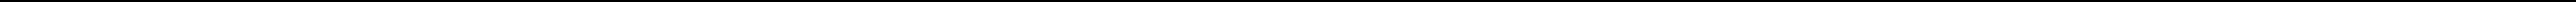

In [142]:
#Displaying the tree
from IPython.display import display
display(chunk_tree)

Since the amount of data in the new7wonders corpus is huge, the visualization about resulted in a thin line. If we click on the image and open the image in a new tab, we can zoom in and cleary see the vizualization.

#### 2. Dependency Parsing

In [143]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---new7wonder[advmod]--->[]
--------
[]<---world[nmod]--->['20002007']
--------
[]<---20002007[nummod]--->[]
--------
['world']<---campaign[nsubj]--->[]
--------
['new7wonder', 'campaign']<---start[nsubj]--->['2000']
--------
[]<---2000[nummod]--->[]
--------
['start']<---choose[ROOT]--->['selection']
--------
[]<---wonder[compound]--->[]
--------
[]<---world[compound]--->[]
--------
['wonder', 'world']<---selection[dobj]--->[]
--------
[]<---200[nummod]--->[]
--------
[]<---exist[amod]--->[]
--------
[]<---monument[compound]--->[]
--------
['monument']<---popularity[compound]--->[]
--------
['200', 'exist', 'popularity']<---poll[nsubj]--->[]
--------
['poll']<---lead[ROOT]--->['weber', 'organize']
--------
[]<---canadian[amod]--->[]
--------
[]<---swiss[amod]--->[]
--------
[]<---bernard[compound]--->[]
--------
['canadian', 'swiss', 'bernard']<---weber[dobj]--->[]
--------
[]<---organize[advcl]--->['announce']
--------
[]<---new7wonders[compound]--->[]
--------
[]<---foundation[co

We can clearly see the relations here for example ['new7wonder', 'campaign']<---start[nsubj]--->['2000']

In [144]:
#Visualizing the results
from spacy import displacy
displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

References:
    1. https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
    2. https://spacy.io/
    3. https://www.nltk.org/